## 케라스 이용해서 분류 해보기.(테스트 버전)

#### ML 라이브러리에 이미 Fashion-MNIST 데이터/API 가 포함되어 있음.
#### 각 훈련 및 테스트 예제의 레이블
> Lable 0. T-shirt/top </br>
> Lable 1. Trouser </br>
> Lable 2. Pullover </br>
> Lable 3. Dress </br>
> Lable 4. Coat </br>
> Lable 5. Sandal </br>
> Lable 6. Shirt </br>
> Lable 7. Sneaker </br>
> Lable 8. Bag </br>
> Lable 9. Ankle boot </br>


#### 텐서플로우의 고수준 API인 케라스(tf.keras)를 사용하여 패션 아이템 분류 신경망 학습
#### 학습 과정 : 1. 데이터셋 준비 -> 2. 모델 생성 -> 3. 학습 -> 4. 예측
#### 패션 MNIST 데이터 셋 : 70000개 그레이스케일 이미지와 각 이미지의 품목 이름을 나타내는 라벨로 구성된다. </br> 하나의 이미지는 10가지 카테고리 중 하나를 나타내며 어떤 품목인지는 라벨에 0~9 사이 정수로 기록되어 있다.


##### 학습 참고 영상. https://youtu.be/VKBSqg57oec

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## train 데이터 셋과 test 데이터 셋 

(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()
train_images.shape

4431872/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [5]:
print(train_images[0].shape)
print(train_labels.shape)
print(train_labels[0].shape)
print(test_images.shape)
print(test_labels.shape)

(28, 28)
(60000,)
()
(10000, 28, 28)
(10000,)


In [7]:
np.set_printoptions(linewidth=150)
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [8]:
train_labels[0]

9

In [10]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag','Angle boot']
class_names[train_labels[0]]

'Angle boot'

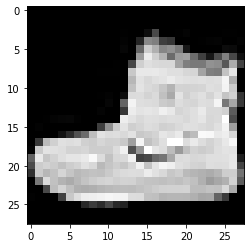

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

In [15]:
np.set_printoptions(linewidth=300)
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        

In [33]:
# 신경망 모델 생성


np.round(train_images[0], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.29, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.53, 0.5 , 0.24, 0.21, 0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.4 , 0.8 , 0.69, 0.53,

In [21]:
## What is .....
model = keras.Sequential([
    keras.

]


SyntaxError: invalid syntax (Temp/ipykernel_11140/332957726.py, line 4)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 585us/step - loss: 0.5021 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 1s 576us/step - loss: 0.3787 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 1s 576us/step - loss: 0.3398 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.3152 - accuracy: 0.8833
Epoch 5/10
1875/1875 [==============================] - 1s 585us/step - loss: 0.2980 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 1s 578us/step - loss: 0.2804 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.2697 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.2573 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 1s 579us/step - loss: 0.2481 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 1s 580u

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 435us/step - loss: 0.3352 - accuracy: 0.8843


In [26]:
test_loss, test_acc

(0.33520829677581787, 0.8842999935150146)

In [27]:
img = test_images[32]
label = test_labels[32]
img.shape

(28, 28)

In [28]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
predictions = model.predict(img)

In [31]:
predictions

array([[1.15195394e-03, 5.75529374e-02, 5.44720562e-04, 9.24333155e-01, 2.22515533e-04, 1.20231976e-04, 3.34650744e-04, 5.91348362e-06, 1.57139469e-02, 1.99942224e-05]], dtype=float32)

In [32]:
print(np.argmax(predictions))
print(label)
class_names[np.argmax(predictions)]

3
3


'Dress'